# Perform object detection with pollen-vision

Learn how to perform zero shot object detection with the pollen-vision library, using the OWL-ViT model.

This notebook will show you how to use our wrapper for the OWL-ViT object detection model developed by the Google Research lab. 

![Object detection from Reachy's egocentric view](gif/reachy_kitchen_detection.gif)

## A word on OWL-ViT
OWL-ViT stands for Vision Transformer for Open-World Localization. It is a zero shot object detection model, meaning the model is able to perform object detection based on text queries, without needing to retrain the model on any labeled data, as it is the case with traditional Deep Learning object detection models.

You can find more information on the model on the dedicated page of the [Hugging Face documentation](https://huggingface.co/docs/transformers/model_doc/owlvit). The implementation of the wrapper actually uses Hugging Face's [transformers library](https://huggingface.co/docs/transformers/index).

In [1]:
import numpy as np
from PIL import Image

from pollen_vision.vision_models.object_detection import OwlVitWrapper

In [2]:
object_detection_wrapper = OwlVitWrapper()

Import the image you want to perform the inference on. 

Here we will take one of the test image of the project. We placed the demo images in sub folder in the images folder. Each subfolder is for a different situation where we recorded what Reachy was doing using teleoperation. Feel free to try with your own image!

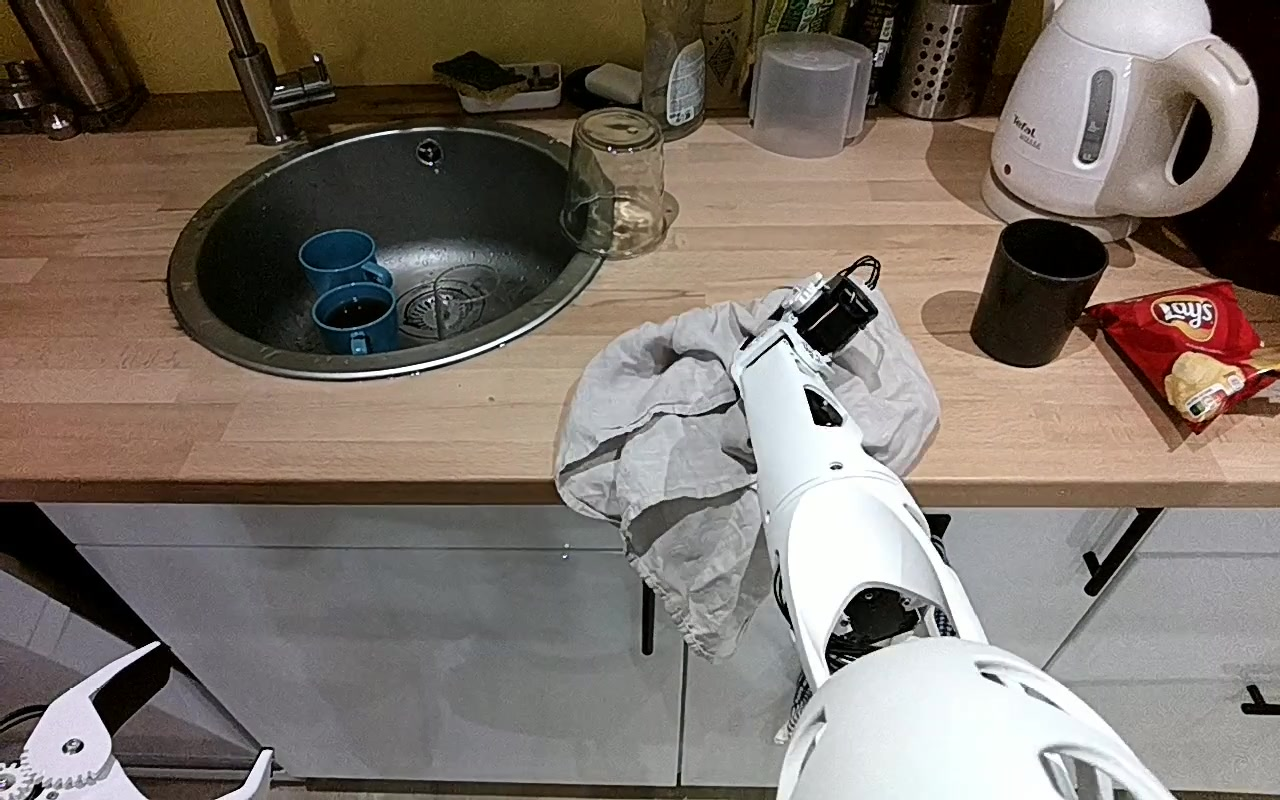

In [12]:
img = Image.open("images/kitchen-counter/kitchen_counter_06.jpg")
img

## Run inference with the model

As explained, the OWL-ViT model is a zero shot object detection model and takes text queries as input. The inference is performed with the *infer* method. Just pass as argument a list of the candidate for the object detection that you want to detect. OWL-ViT will only try to detect classes that are in the list.

NB: Please note that the image passed as argument for the *infer* method must be a **numpy array object**.

In [13]:
predictions = object_detection_wrapper.infer(
    im=np.array(img),
    candidate_labels=["kettle", "black mug", "sink", "blue mug", "sponge", "bag of chips"],
    detection_threshold=0.15,
)

predictions

[{'score': 0.3089343309402466,
  'label': 'kettle',
  'box': {'xmin': 991, 'ymin': -4, 'xmax': 1266, 'ymax': 225}},
 {'score': 0.265211820602417,
  'label': 'blue mug',
  'box': {'xmin': 296, 'ymin': 228, 'xmax': 399, 'ymax': 349}},
 {'score': 0.2525636851787567,
  'label': 'sink',
  'box': {'xmin': 162, 'ymin': 118, 'xmax': 621, 'ymax': 380}},
 {'score': 0.19630835950374603,
  'label': 'bag of chips',
  'box': {'xmin': 1077, 'ymin': 279, 'xmax': 1277, 'ymax': 443}},
 {'score': 0.18654944002628326,
  'label': 'black mug',
  'box': {'xmin': 970, 'ymin': 219, 'xmax': 1117, 'ymax': 368}}]

Change the candidates list and check what you can detect!

### Visualize detection results

You can visualize easliy the predictions of the model with the *Annotator* class from utils.

In [14]:
from pollen_vision.vision_models.utils import Annotator

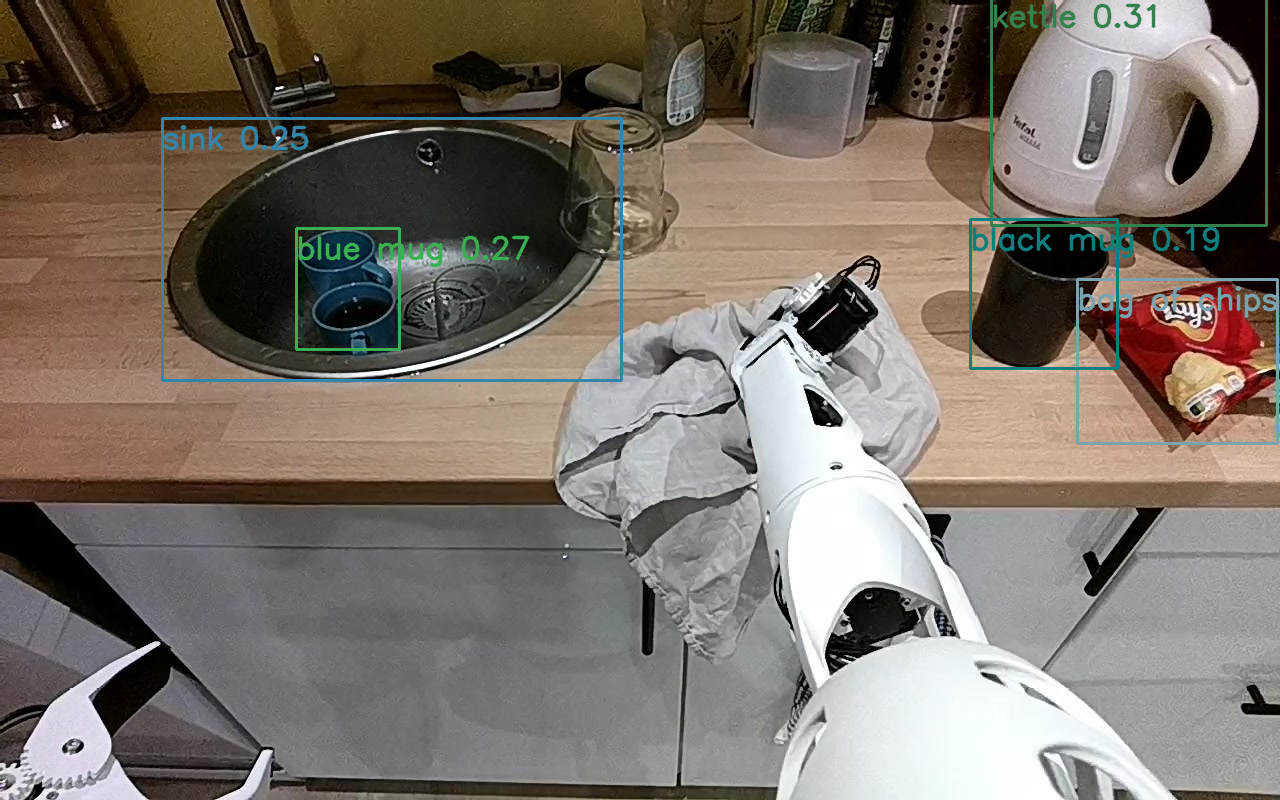

In [15]:
annotator = Annotator()

img_annotated = annotator.annotate(im=np.array(img), detection_predictions=predictions)
Image.fromarray(img_annotated)  # annotator returns a numpy array object

## Final notes

That's all folks! You can use this script if you want to perform zero shot object detection on video frames. The scripts gathers every commands that you saw here in the notebook.

Check out the other notebooks if you want to learn how to use other vision models like RAM for image tagging or SAM to perform object segmentation.